![](http://www.gadgetmed.com/wp-content/uploads/game-console-repair-warner-robins.gif)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


By calling the dataframe method "info()", we also discover that the "User_Score" column which should be best represented numerically, contains strings. Therefore we'll also convert that column to string type

In [5]:
df.User_Score.unique() #There is 'tbd'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
#convert to numeric, turn 'tbd' to nan
df.User_Score = pd.to_numeric(df.User_Score, errors='coerce')

In [7]:
df.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

### Check to see if there is missing data

In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### There are quite a few missing data for information about scores, developer, and rating information about the game.

#### Since they are important, we will drop them???

In [9]:
df = df.dropna(axis=0)
df.shape

(6825, 16)

### Only 40% left....................

In [10]:
#Change some other types
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [11]:
df.info() # the data looks good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null int64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null int64
User_Score         6825 non-null float64
User_Count         6825 non-null int64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


In [12]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


# Univariate Analysis
## Explore Each of the variables

In [13]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## Name

In [14]:
df.Name.nunique()

4377

Not every one is unique, check to see what the duplicates look like

In [15]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50,8.2,3994,Rockstar North,M
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58,8.1,3711,Rockstar North,M
42,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66,8.3,2899,Rockstar North,M
165,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14,7.9,764,Rockstar North,M
1730,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57,7.9,3756,Rockstar North,M


These are the games that have versions across multiple platforms.

## Platform

In [16]:
df.Platform.value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

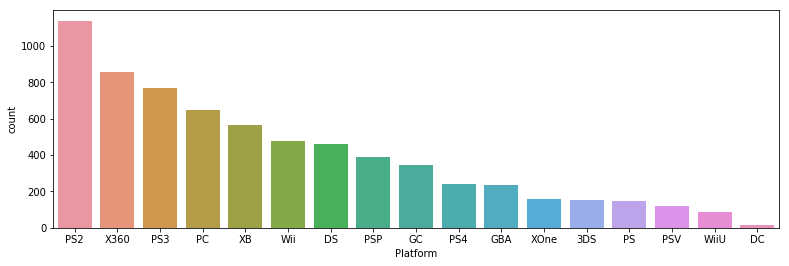

In [17]:
plt.figure(figsize=(13, 4))
sns.countplot(df.Platform, order = df.Platform.value_counts().index);

## Year_of_Release

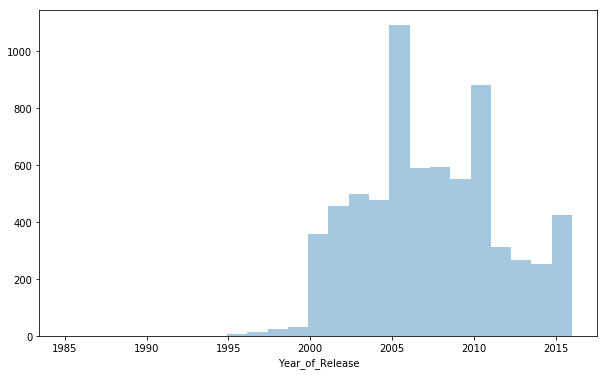

In [18]:
plt.figure(figsize=(10, 6))
sns.distplot(df.Year_of_Release, kde = False, bins=df.Year_of_Release.nunique())

## Genre

In [19]:
df.Genre.value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

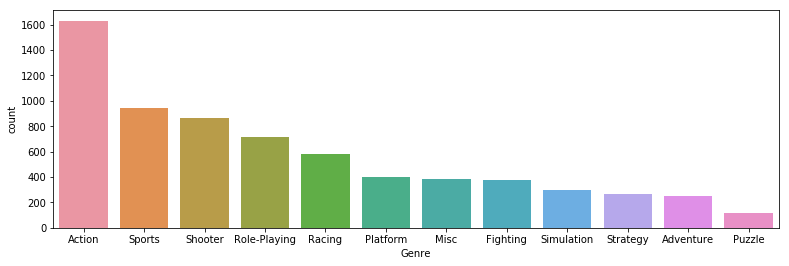

In [20]:
plt.figure(figsize=(13, 4))
sns.countplot(df.Genre, order = df.Genre.value_counts().index)

## Publisher

In [21]:
df.Publisher.nunique()

262

In [22]:
df.Publisher.value_counts().iloc[:40]

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

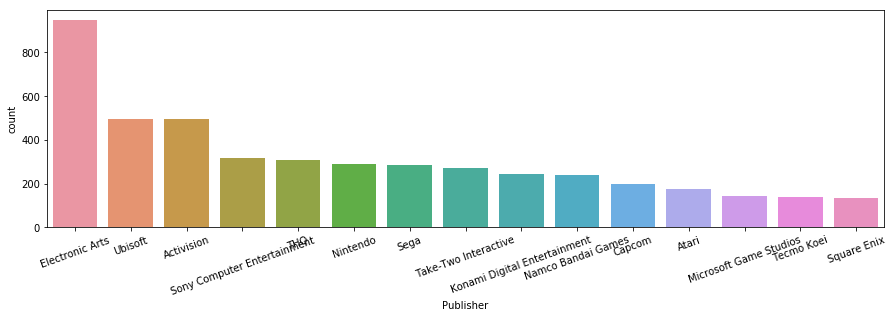

In [23]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Publisher, order=df.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Developer

Developers are subtypes of publishers

In [24]:
df.Developer.nunique()

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

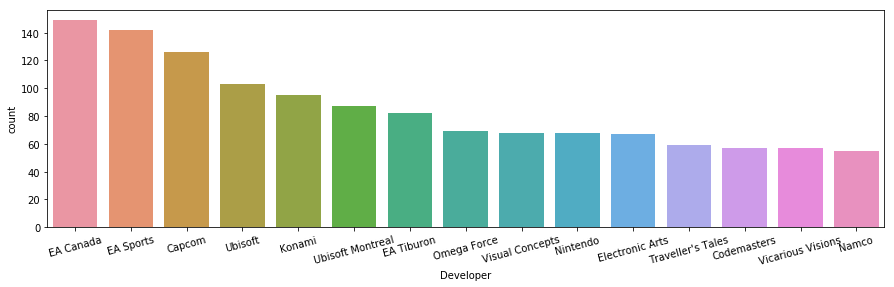

In [25]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

## Ratings

In [26]:
df.Rating.value_counts()

T       2377
E       2082
M       1433
E10+     930
RP         1
AO         1
K-A        1
Name: Rating, dtype: int64

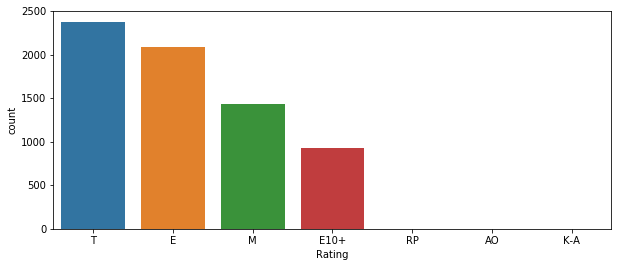

In [27]:
plt.figure(figsize=(10, 4))
sns.countplot(df.Rating, order=df.Rating.value_counts().iloc[:15].index)

## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [28]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

0    True
2    True
3    True
6    True
7    True
dtype: bool

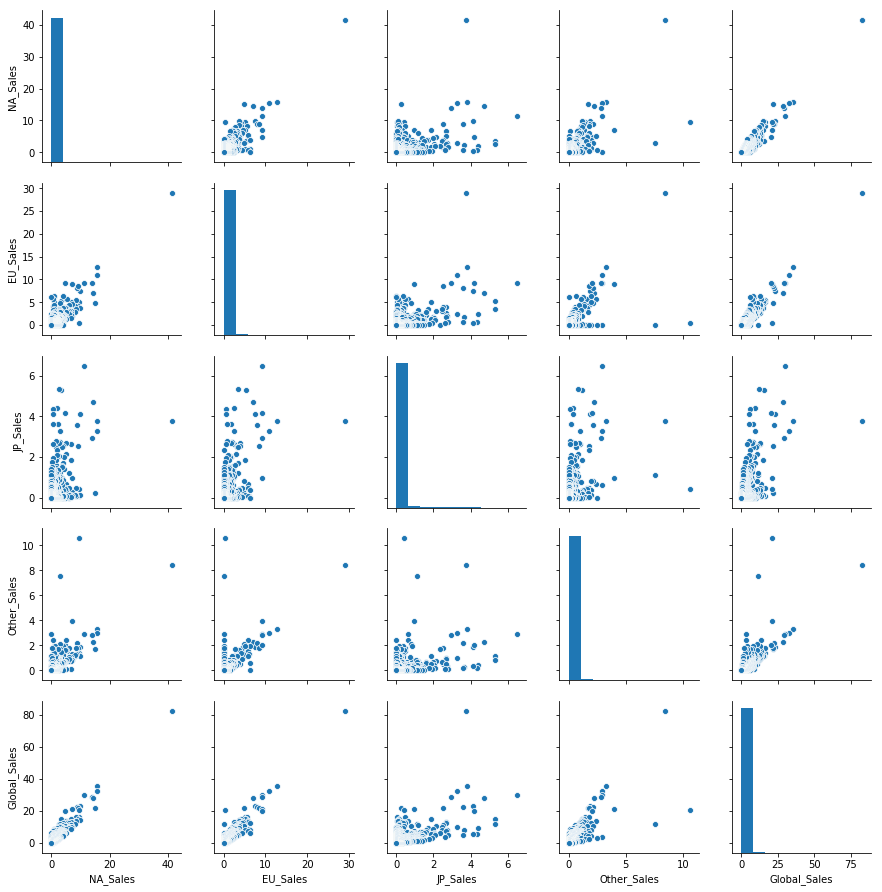

In [29]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

After plotting the sales graphs in the beginning, it turned out that they were totally dominated by the value zero\near-zero. I have kept the original graph just for reference, but then next to it there is the graph on the log-scale (for the y -axis, x-axis is kept) and finally the box plot for the region's sales.

C:\Users\winuser\Anaconda2\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


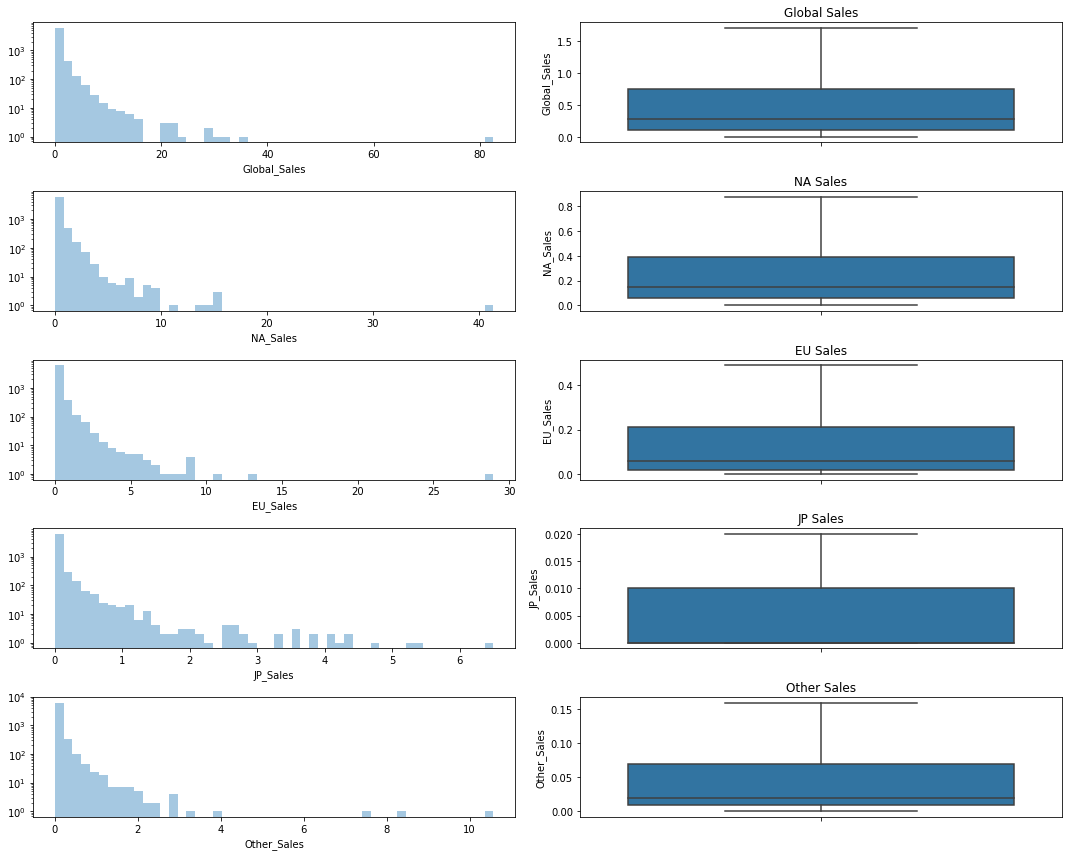

In [30]:
plt.figure(figsize=(15, 12))
plt.subplot(5,2,1)
sns.distplot(df.Global_Sales, kde=False)
plt.yscale('log')
plt.subplot(5,2,2)
sns.boxplot(df.Global_Sales, orient = 'v',showfliers=False) #Do not display outliers
plt.title('Global Sales')

plt.subplot(5,2,3)
sns.distplot(df.NA_Sales, kde=False)
plt.yscale('log')
plt.subplot(5,2,4)
sns.boxplot(df.NA_Sales, orient = 'v',showfliers=False)
plt.title('NA Sales')

plt.subplot(5,2,5)
sns.distplot(df.EU_Sales, kde=False)
plt.yscale('log')
plt.subplot(5,2,6)
sns.boxplot(df.EU_Sales, orient = 'v',showfliers=False)
plt.title('EU Sales')

plt.subplot(5,2,7)
sns.distplot(df.JP_Sales, kde=False)
plt.yscale('log')
plt.subplot(5,2,8)
sns.boxplot(df.JP_Sales, orient = 'v',showfliers=False)
plt.title('JP Sales')

plt.subplot(5,2,9)
sns.distplot(df.Other_Sales, kde=False)
plt.yscale('log')
plt.subplot(5,2,10)
sns.boxplot(df.Other_Sales, orient = 'v',showfliers=False)
plt.title('Other Sales')
plt.tight_layout()

## Critic_Score, Critic_Count, User_Score, User_Count

C:\Users\winuser\Anaconda2\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


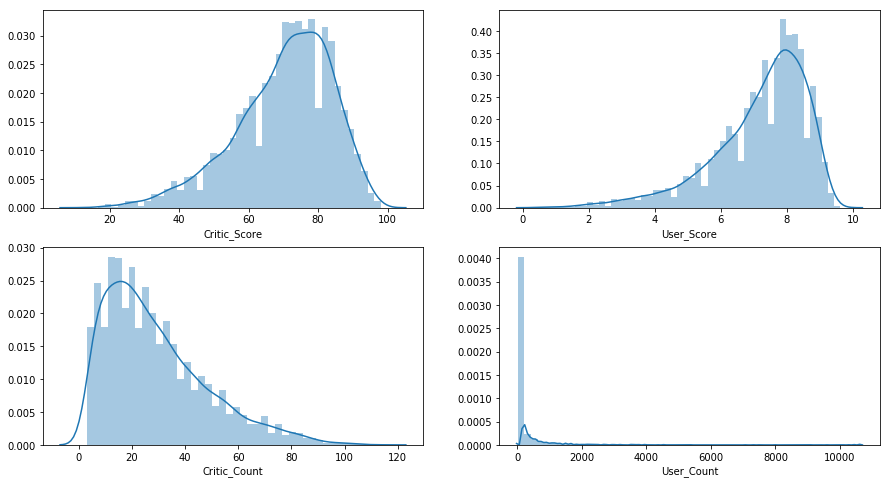

In [31]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df.User_Score)

plt.subplot(2,2,3)
sns.distplot(df.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df.User_Count)

# Univariate Conclusions

<https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis>

The dataset is comprehensive, although some of the data is missing, especially for the score. Maybe that makes predicting the scores of the missing values an interesting task.

For the video game production, there is a peak in production around 2009. Maybe the global crisis had such negative impact on game production? That could be a question to further explore in the bivariate analysis.

The recurring shape in this dataset is the exponential decay. There are some stellar scores\sales, then quickly drop down. Also, for the sales, the sales in North America is the highest - by a good margin, then the European Union, followed by the sales in Japan, then finally the sales in the remaining countries combined (Wow).

Generally, it seems that the critic scores are more conservative than the user scores, the user scores are more negatively skewed, having its mode in a better scoring range. It will be interesting to see how the user scores correlate to critic scores.

For the genre, I must admit I was a bit surprised by the ranking of the strategy and fighting genres.

For the developer, again the exponential decay comes back. Few studios\producers do well, and then quickly they fall. What is interesting is that several EA subdivisions are listed independently, if they get combined (Like EA Sports, EA Canada..etc), Electronic Arts would become the top developer.

# Bivariate Analysis

In [32]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

init_notebook_mode(connected=True)